In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files

In [4]:
data = pd.read_csv('appl.csv')

In [5]:
data.drop('Unnamed: 0', axis = 1, inplace = True)

In [6]:
data.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,AAPL,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,AAPL,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,AAPL,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,AAPL,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


# Time Series Analysis using ARIMA

In [7]:
data['date'] = pd.to_datetime(data['date'])

In [8]:
ts_df = data.set_index(data['date'])['close']

In [9]:
data['date'].dtypes

datetime64[ns, UTC]

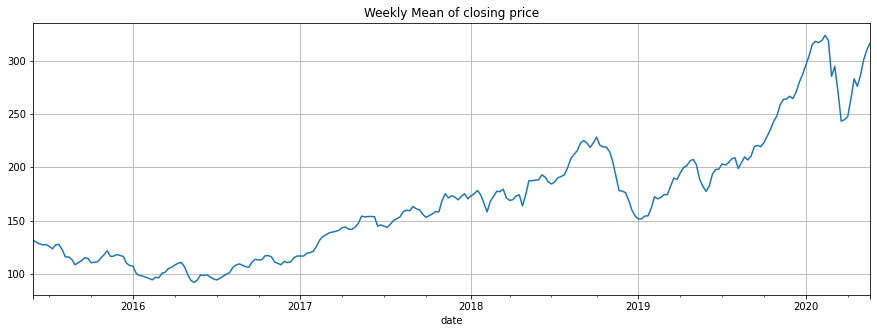

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,5))
ts_df.resample('w').mean().plot()
plt.title('Weekly Mean of closing price')
plt.grid()
plt.show()

In [11]:
# Test for seasonality
def stationary_checker(df,x):
    from statsmodels.tsa.stattools import adfuller
    
    # Rolling Statistics test
    rolling_mean = df.rolling(window = 12).mean()
    rolling_std =  df.rolling(window = 12).std()
    
    print('Rolling Statistics Test')
    plt.figure(figsize=(15,5))
    original = plt.plot(df,color = 'blue', label = 'Original')
    rol_mean = plt.plot(rolling_mean, color = 'red', label = 'Rolling_mean')
    rol_std = plt.plot(rolling_std, color = 'green', label = 'Rolling_std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Rolling Std')
    plt.grid()
    plt.show()
    
    print('Argumented Dicky Fuller Test')
    # ADF Test
    result = adfuller(x, autolag='AIC')
    print('ADF Statistic:', result[0])
    print(f'p-value:', result[1])
    for key, value in result[4].items():
        print('Critial Values:')
        print( key, value)

Rolling Statistics Test


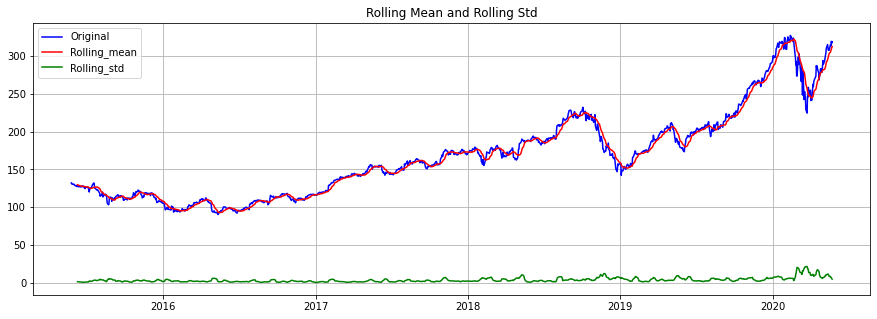

Argumented Dicky Fuller Test
ADF Statistic: -0.10012966467734814
p-value: 0.9494256168598442
Critial Values:
1% -3.435638861796935
Critial Values:
5% -2.863875547501718
Critial Values:
10% -2.5680134763122906


In [12]:
import warnings
warnings.filterwarnings('ignore')
stationary_checker(ts_df, ts_df.values)

In [13]:
# We can see that rolling mean and the rolling std varry with respect to time, 
# Trying to make the series Stationarity

ts_df_1_shift = ts_df.shift(periods= 7)
ts_df_1_shift.head(5)

date
2015-05-27 00:00:00+00:00   NaN
2015-05-28 00:00:00+00:00   NaN
2015-05-29 00:00:00+00:00   NaN
2015-06-01 00:00:00+00:00   NaN
2015-06-02 00:00:00+00:00   NaN
Name: close, dtype: float64

Rolling Statistics Test


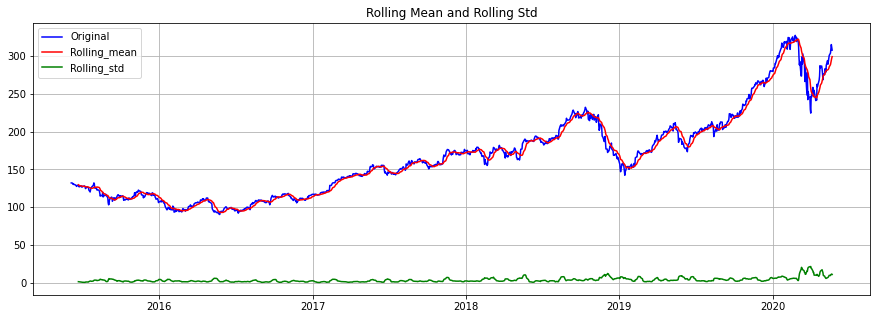

Argumented Dicky Fuller Test
ADF Statistic: -0.052277707331735736
p-value: 0.953989244614626
Critial Values:
1% -3.4356863371792095
Critial Values:
5% -2.8638964938393667
Critial Values:
10% -2.568024631481501


In [14]:
import warnings
warnings.filterwarnings('ignore')
ts_df_1_shift.dropna(inplace= True)
stationary_checker(ts_df_1_shift, ts_df_1_shift.values)

In [16]:
from pmdarima import auto_arima
auto_arima(ts_df,seasonal=False).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1258
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -3345.465
Date:                Tue, 29 Dec 2020   AIC                           6702.930
Time:                        04:51:52   BIC                           6733.749
Sample:                             0   HQIC                          6714.513
                               - 1258                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5496      0.346      1.587      0.113      -0.129       1.228
ar.L1         -1.7669      0.012   -141.731      0.000      -1.791      -1.742
ar.L2         -0.9208      0.012    -75.044      0.000      -0.945      -0.897
ma.L1          1.6697      0.017     95.752      0.000       1.636       1.704
ma.L2          0.7949      0.017     47.391      0.000       0.762       0.828
sigma2        11.9958      0.189     63.309      0.000      11.624      12.367
===================================================================================
Ljung-Box (L1) (Q):                   0.78   Jarque-Bera (JB):              9402.67
Prob(Q):                              0.38   Prob(JB):                         0.00
Heteroskedasticity (H):               9.49   Skew:                            -0.66
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
from statsmodels.tsa.arima_model import ARMA,ARMAResults,ARIMA,ARIMAResults

In [19]:
train = ts_df[0:944]
test = ts_df[945:]

In [22]:
model = ARIMA(train,order=(2,1,2))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.close   No. Observations:                  943
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -2145.791
Method:                       css-mle   S.D. of innovations              2.349
Date:                Tue, 29 Dec 2020   AIC                           4303.582
Time:                        05:23:45   BIC                           4332.676
Sample:                             1   HQIC                          4314.671
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0451      0.078      0.581      0.561      -0.107       0.197
ar.L1.D.close     0.7354      0.004    171.239      0.000       0.727       0.744
ar.L2.D.close    -0.9938      0.004   -248.440      0.000      -1.002      -0.986
ma.L1.D.close    -0.7243      0.003   -208.322      0.000      -0.731      -0.717
ma.L2.D.close     0.9999      0.005    194.502      0.000       0.990       1.010
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3700           -0.9324j            1.0031           -0.1899
AR.2            0.3700           +0.9324j            1.0031            0.1899
MA.1            0.3622           -0.9321j            1.0000           -0.1910
MA.2            0.3622           +0.9321j            1.0000            0.1910
-----------------------------------------------------------------------------
"""

In [67]:
start = len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_train = results.predict(start=2, end=len(train), dynamic=False, typ='levels')

In [60]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test, predictions))

72.21430963945838

In [76]:
# plot baseline and prediction
train_plot = np.empty_like(ts_df)
train_plot[0:len(predictions_train)] = predictions_train
train_plot[len(predictions_train):len(ts_df)] = np.nan
train_plot = pd.Series(train_plot)
train_plot.index = ts_df.index

test_plot = np.empty_like(ts_df)
test_plot[0:len(predictions_train)] = np.nan
test_plot[len(predictions_train)+2:len(ts_df)] = predictions
test_plot = pd.Series(test_plot)
test_plot.index = ts_df.index


No handles with labels found to put in legend.


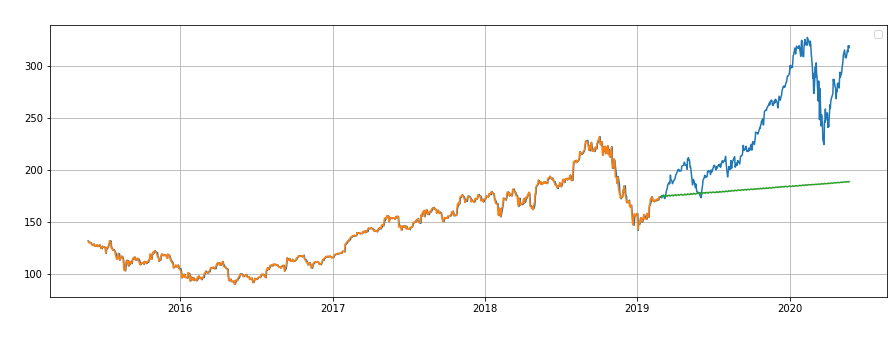

In [78]:

plt.figure(figsize = (15,5))
plt.plot(ts_df)
plt.plot(train_plot)
plt.plot(test_plot)
plt.title("Actual / Train-Predicted / Test-Predicted Results", color = 'white', fontsize = 15)
plt.xlabel("time", color = 'white', fontsize = 12)
plt.ylabel("STOCK PRICE", color = 'white', fontsize = 12)
plt.legend(loc = True)
plt.grid()
plt.show()

In [121]:
ts_df.mean()

167.72399841017477

# The autoarima model's PDQ values didn't do the best job.
# And the RMSE is 72 with the mean of the close price being overall and test batch being 167 and 270 repectively.
# The forecast is just average.

In [138]:
# Trying to build an ARMA model, and selecting P, Q values traditionally 

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf # for determining (p,q) orders
from statsmodels.tsa.seasonal import seasonal_decompose
ts_df.sort_index(inplace= True)

In [140]:
results = seasonal_decompose(ts_df, model='additive',extrapolate_trend='freq', period=1)

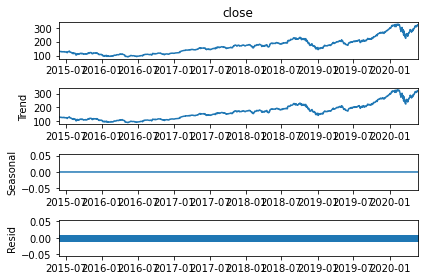

In [142]:
results.plot();

In [143]:
# We interpret that there is a positive trend and no seasonality in the data

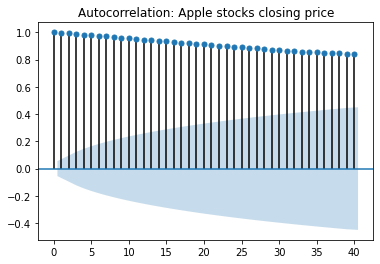

In [148]:
title = 'Autocorrelation: Apple stocks closing price'
lags = 40
plot_acf(ts_df,title=title,lags=lags);

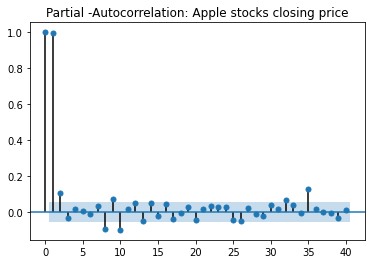

In [146]:
title = 'Partial -Autocorrelation: Apple stocks closing price'
lags = 40
plot_pacf(ts_df,title=title,lags=lags);

In [150]:
model_1 = ARIMA(ts_df,order=(2,0,0))
results_1 = model_1.fit()
results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  close   No. Observations:                 1258
Model:                     ARMA(2, 0)   Log Likelihood               -3397.931
Method:                       css-mle   S.D. of innovations              3.595
Date:                Tue, 29 Dec 2020   AIC                           6803.862
Time:                        06:56:45   BIC                           6824.411
Sample:                             0   HQIC                          6811.585
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         208.9578     73.014      2.862      0.004      65.853     352.063
ar.L1.close     0.8032      0.027     29.821      0.000       0.750       0.856
ar.L2.close     0.1960      0.027      7.273      0.000       0.143       0.249
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0006           +0.0000j            1.0006            0.0000
AR.2           -5.0987           +0.0000j            5.0987            0.5000
-----------------------------------------------------------------------------
"""

In [151]:
start = len(train)
end=len(train)+len(test)-1
predictions = results_1.predict(start=start, end=end, dynamic=False, typ='levels')
predictions_train = results_1.predict(start=2, end=len(train), dynamic=False, typ='levels')

In [152]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(test, predictions))

7.143899454632144

In [153]:
# plot baseline and prediction
train_plot = np.empty_like(ts_df)
train_plot[0:len(predictions_train)] = predictions_train
train_plot[len(predictions_train):len(ts_df)] = np.nan
train_plot = pd.Series(train_plot)
train_plot.index = ts_df.index

test_plot = np.empty_like(ts_df)
test_plot[0:len(predictions_train)] = np.nan
test_plot[len(predictions_train)+2:len(ts_df)] = predictions
test_plot = pd.Series(test_plot)
test_plot.index = ts_df.index


No handles with labels found to put in legend.


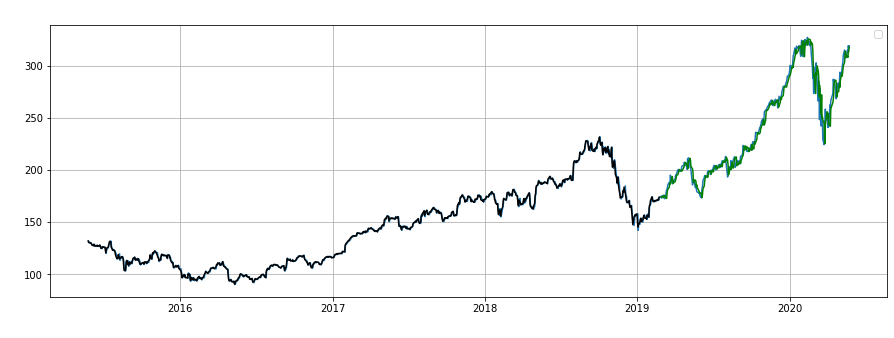

In [163]:

plt.figure(figsize = (15,5))
plt.plot(ts_df)
plt.plot(train_plot, color = 'black')
plt.plot(test_plot, color = 'green')
plt.title("Actual / Train-Predicted / Test-Predicted Results", color = 'white', fontsize = 15)
plt.xlabel("time", color = 'white', fontsize = 12)
plt.ylabel("STOCK PRICE", color = 'white', fontsize = 12)
plt.legend(loc = True)
plt.grid()
plt.show()

In [ ]:
# The ARMA model does a great job, the RMSE is just 4

# Trying to build an LSTM model

In [79]:
# Stock forecast uisng LSTM
df2 = data.reset_index()['close']

In [80]:
df2.head()

0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [81]:
# LSTMs are sensitive to the scale of the data so we need to scale the data
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler(feature_range = (0,1))
df1 = min_max_scaler.fit_transform(np.array(df2).reshape(-1,1))

In [82]:
df1

array([[0.17607447],
       [0.17495567],
       [0.16862282],
       ...,
       [0.96635143],
       [0.9563033 ],
       [0.96491598]])

In [83]:
# The LSTM model will take the data in a selective format, let's perform that

In [84]:
# Train Test Split
train_size = int(len(df1)*0.65)
test_size = len(df1)-train_size
train_data, test_data = df1[:train_size] , df1[train_size:]

In [85]:
(train_size, test_size)

(817, 441)

In [86]:
# Create the dataset for the Lstm mode

def create_model(dataset, timestep):
  dataX, dataY = [], []
  for i in range(len(dataset) - timestep -1):
    a = dataset[i:(i+timestep), 0]
    dataX.append(a)
    dataY.append(dataset[i+timestep,0])
  return np.array(dataX), np.array(dataY)

In [87]:
X_train, y_train = create_model(train_data, 100)

In [88]:
X_test, y_test = create_model(test_data, 100)

In [89]:
for i in [X_train, y_train, X_test, y_test]:
  print(i.shape)

(716, 100)
(716,)
(340, 100)
(340,)


In [90]:
# Creating the stack LSTM

In [91]:
# LSTM models can only accept the data in a selective format, reshaping the data to create it.
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [92]:
# Invoking the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [174]:
model = Sequential()
model.add(LSTM(100, return_sequences= True, input_shape = (100,1))) # Input layer
model.add(LSTM(100, return_sequences= True))
model.add(LSTM(100, return_sequences= True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [175]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_12 (LSTM)               (None, 100, 100)          40800     
_________________________________________________________________
lstm_13 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
lstm_14 (LSTM)               (None, 100, 100)          80400     
_________________________________________________________________
lstm_15 (LSTM)               (None, 50)                30200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 231,851
Trainable params: 231,851
Non-trainable params: 0
_________________________________________________________________


In [176]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs= 100, batch_size= 100)

Epoch 1/100
8/8 [==============================] - 15s 985ms/step - loss: 0.0307 - val_loss: 0.0607
Epoch 2/100
8/8 [==============================] - 6s 734ms/step - loss: 0.0029 - val_loss: 0.0192
Epoch 3/100
8/8 [==============================] - 6s 751ms/step - loss: 0.0017 - val_loss: 0.0056
Epoch 4/100
8/8 [==============================] - 6s 780ms/step - loss: 8.6704e-04 - val_loss: 0.0066
Epoch 5/100
8/8 [==============================] - 6s 776ms/step - loss: 8.9311e-04 - val_loss: 0.0065
Epoch 6/100
8/8 [==============================] - 6s 793ms/step - loss: 8.0330e-04 - val_loss: 0.0055
Epoch 7/100
8/8 [==============================] - 6s 748ms/step - loss: 8.1537e-04 - val_loss: 0.0078
Epoch 8/100
8/8 [==============================] - 6s 784ms/step - loss: 7.4005e-04 - val_loss: 0.0061
Epoch 9/100
8/8 [==============================] - 6s 762ms/step - loss: 7.0347e-04 - val_loss: 0.0055
Epoch 10/100
8/8 [==============================] - 6s 762ms/step - loss: 7.4306e-04

In [177]:
# Let's predict using this model
y_tarin_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [178]:
# Inverse Transormation 
y_tarin_pred = min_max_scaler.inverse_transform(y_tarin_pred)
y_test_pred = min_max_scaler.inverse_transform(y_test_pred)


In [179]:
# Evaluating the model performance
import math
from sklearn.metrics import mean_squared_error
print("Train RMSE ",math.sqrt(mean_squared_error(min_max_scaler.inverse_transform(y_train.reshape(1,-1))[0], y_tarin_pred)))
print("Test RMSE ",math.sqrt(mean_squared_error(min_max_scaler.inverse_transform(y_test.reshape(1,-1))[0], y_test_pred)))

Train RMSE  3.2906225261622972
Test RMSE  9.406503780840856


In [180]:
# Plotting train and test data
# shift trian predictions timestep =100
look_back = 100
trainpredictplot = np.empty_like(df1)
trainpredictplot[:,:] = np.nan
trainpredictplot[look_back:len(y_tarin_pred)+look_back,:] = y_tarin_pred

In [181]:
# shifting test predictions timestamp = 100
testpredictplot = np.empty_like(df1)
testpredictplot[:,:] =  np.nan
testpredictplot[len(y_tarin_pred)+(look_back*2)+1: len(df1)-1, :] = y_test_pred

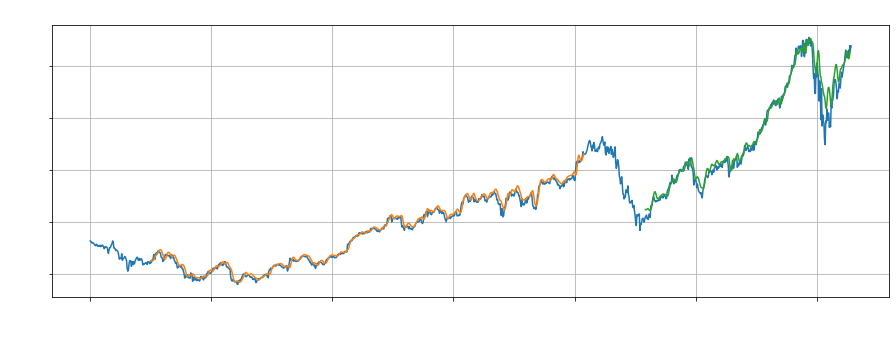

In [182]:
# plot baseline and prediction
plt.figure(figsize = (15,5))
plt.plot(min_max_scaler.inverse_transform(df1))
plt.plot(trainpredictplot)
plt.plot(testpredictplot)
plt.title("Actual / Train-Predicted / Test-Predicted Results", color = 'white', fontsize = 15)
plt.xlabel("time", color = 'white', fontsize = 12)
plt.ylabel("STOCK PRICE", color = 'white', fontsize = 12)
plt.xticks( color = 'white', fontsize = 11)
plt.yticks(color = 'white', fontsize = 11)
plt.grid()
plt.show()

In [183]:
# Forecasting the Future thy clairvoyance \m/

x_inputs = test_data[341:].reshape(1,-1)

In [184]:
temp_inputs = x_inputs[0].tolist()

In [185]:
l_op = []
n_steps = 100
i = 0
while(i< 30):
  if (len(temp_inputs) > 100):
    x_input = np.array(temp_inputs[1:])
    # reshaping
    x_input = x_input.reshape((1, n_steps, 1))
    y_hat = model.predict(x_input , verbose = 0)
    temp_inputs.extend(y_hat[0].tolist())
    temp_inputs = temp_inputs[1:]
    # output
    l_op.extend(y_hat[0].tolist())
    i+=1
  else:
    x_input = x_inputs.reshape((1, n_steps, 1))
    # Prediction
    y_hat = model.predict(x_input, verbose= 0)
    temp_inputs.extend(y_hat[0].tolist())
    l_op.extend(y_hat[0].tolist())
    i+=1

print(l_op)

[0.9601184129714966, 0.9574902653694153, 0.9535284042358398, 0.9497382044792175, 0.9467292428016663, 0.9447947144508362, 0.9441219568252563, 0.9447661638259888, 0.9466195106506348, 0.9494467377662659, 0.9529569745063782, 0.9568634033203125, 0.9609280228614807, 0.9649860262870789, 0.9689558744430542, 0.9728310108184814, 0.9766654372215271, 0.980549156665802, 0.9845807552337646, 0.9888460040092468, 0.9933999180793762, 0.9982583522796631, 1.0033961534500122, 1.0087507963180542, 1.014233112335205, 1.0197432041168213, 1.025179386138916, 1.0304515361785889, 1.035488247871399, 1.0402425527572632]


In [186]:
last_100_ips = min_max_scaler.inverse_transform(x_inputs).reshape((1,-1))
forecasts = min_max_scaler.inverse_transform(np.array(l_op).reshape((1,-1)))

In [187]:
final_forecasts = np.empty_like(df1).reshape((1,-1))
final_forecasts[:,:] = np.nan

In [188]:
final_forecasts = np.concatenate([final_forecasts, forecasts], axis = 1)

In [189]:
final_forecasts.shape

(1, 1288)

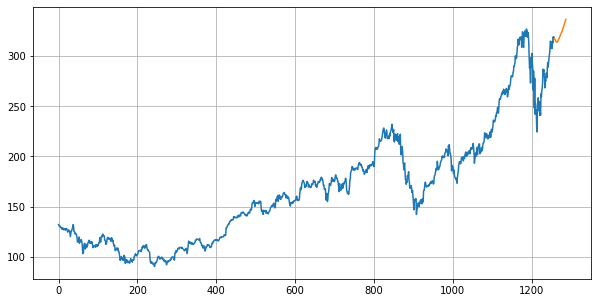

In [190]:

plt.figure(figsize = (10,5))
plt.plot(min_max_scaler.inverse_transform(df1))
plt.plot(final_forecasts[0])
plt.grid()
plt.show()